<a href="https://colab.research.google.com/github/young0228/young0228/blob/main/Rating_Analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reference

https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert

https://www.kaggle.com/code/shivkumarganesh/tiktok-feature-engineering-preprocessing

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
bingo = pd.read_csv('/content/drive/MyDrive/DataSets/doubleu_games/bingo.csv')
casino = pd.read_csv('/content/drive/MyDrive/DataSets/doubleu_games/casino.csv')
casinoslots = pd.read_csv('/content/drive/MyDrive/DataSets/doubleu_games/casinoslots.csv')
take5free = pd.read_csv('/content/drive/MyDrive/DataSets/doubleu_games/take5free.csv')
undead = pd.read_csv('/content/drive/MyDrive/DataSets/doubleu_games/undead.csv')

In [62]:
print(f"Bingo'Shape is {bingo.shape}")
print(f"Casino'Shape is {casino.shape}")
print(f"Casino Slots'Shape is {casinoslots.shape}")
print(f"take5free'Shape is {take5free.shape}")
print(f"Undead'Shape is {undead.shape}")

Bingo'Shape is (431, 8)
Casino'Shape is (1620, 8)
Casino Slots'Shape is (4500, 8)
take5free'Shape is (487, 8)
Undead'Shape is (212, 8)


In [63]:
#To find null values

print(f"bingo\n {bingo.isnull().sum()} \n\n")
print(f"casino\n {casino.isnull().sum()} \n\n")
print(f"casino slots\n {casinoslots.isnull().sum()} \n\n")
print(f"take5free\n {take5free.isnull().sum()} \n\n")
print(f"Undead\n {undead.isnull().sum()}")

bingo
 Unnamed: 0             0
title                  0
userName               0
review                 0
isEdited               0
rating                 0
developerResponse    349
date                   0
dtype: int64 


casino
 Unnamed: 0             0
userName               0
review                 0
developerResponse    677
date                   0
title                  0
isEdited               0
rating                 0
dtype: int64 


casino slots
 Unnamed: 0              0
title                   0
date                    0
rating                  0
isEdited                0
review                  0
developerResponse    2774
userName                0
dtype: int64 


take5free
 Unnamed: 0             0
isEdited               0
rating                 0
date                   0
userName               0
developerResponse    262
title                  0
review                 0
dtype: int64 


Undead
 Unnamed: 0           0
title                0
review               0
userName   

Text(0.5, 1.0, 'undead review score')

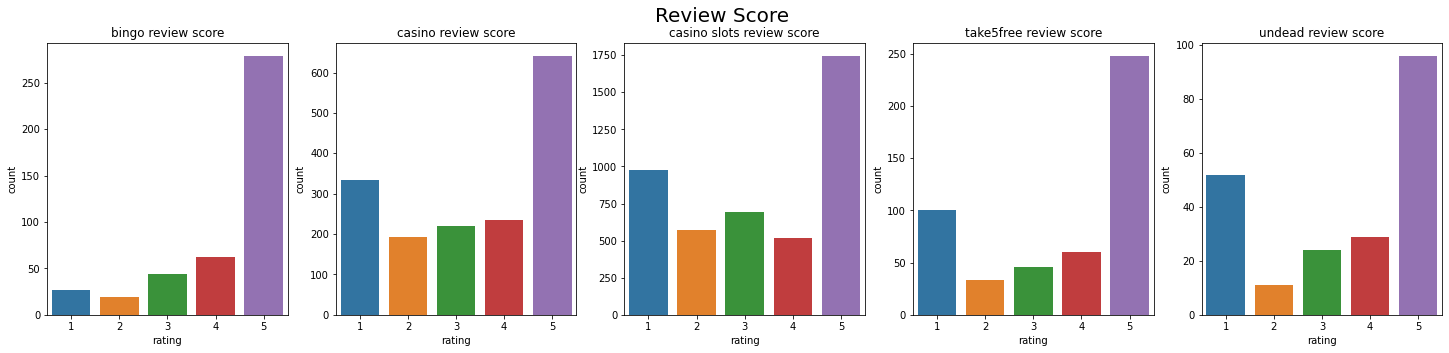

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(25,5), sharey=False)
fig.suptitle('Review Score', size =20)

sns.countplot(ax=axes[0], x="rating", data=bingo)
axes[0].set_title('bingo review score')

sns.countplot(ax=axes[1], x="rating", data = casino)
axes[1].set_title('casino review score')

sns.countplot(ax=axes[2], x="rating", data = casinoslots)
axes[2].set_title('casino slots review score')

sns.countplot(ax=axes[3],x="rating", data = take5free)
axes[3].set_title('take5free review score')

sns.countplot(ax=axes[4],x="rating", data = undead)
axes[4].set_title('undead review score')

In [67]:
def to_sentiment(score):
  scrore = int(score)

  if score <= 2:
    return 0
  elif score ==3:
    return 1
  else:
    return 2

bingo['sentiment'] = bingo.rating.apply(to_sentiment)
casino['sentiment'] = casino.rating.apply(to_sentiment)
casinoslots['sentiment'] = casinoslots.rating.apply(to_sentiment)
take5free['sentiment'] = take5free.rating.apply(to_sentiment)
undead['sentiment'] = undead.rating.apply(to_sentiment)

Text(0.5, 1.0, 'undead')

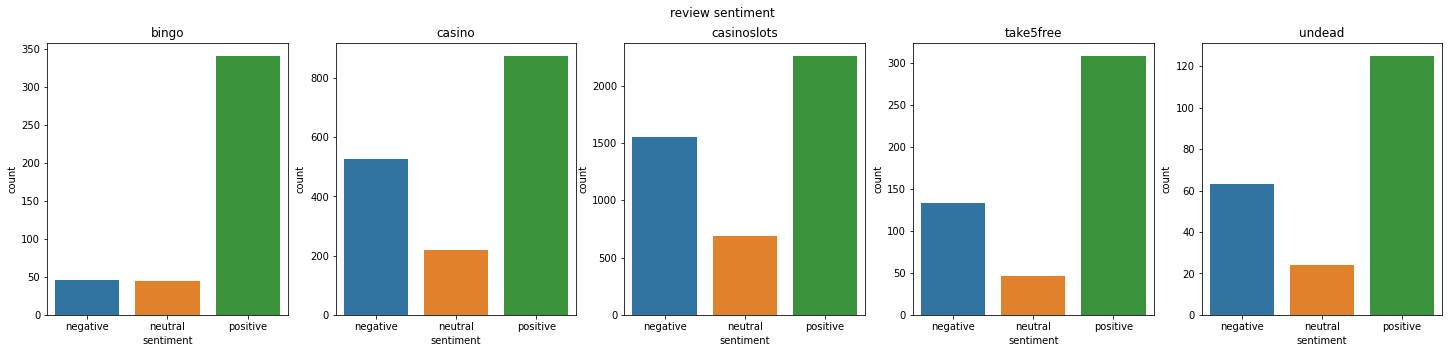

In [72]:
class_names = ['negative', 'neutral', 'positive']

fig, axes = plt.subplots(1, 5, figsize = (25, 5), sharey =False)
fig.suptitle('review sentiment')

sns.countplot(ax=axes[0], x=bingo.sentiment, data=bingo)
axes[0].set_xticklabels(class_names)
axes[0].set_title('bingo')

sns.countplot(ax=axes[1], x=casino.sentiment, data=casino)
axes[1].set_xticklabels(class_names)
axes[1].set_title('casino')

sns.countplot(ax=axes[2], x=casinoslots.sentiment, data=casinoslots)
axes[2].set_xticklabels(class_names)
axes[2].set_title('casinoslots')

sns.countplot(ax=axes[3], x=take5free.sentiment, data=take5free)
axes[3].set_xticklabels(class_names)
axes[3].set_title('take5free')

sns.countplot(ax=axes[4], x=undead.sentiment, data=undead)
axes[4].set_xticklabels(class_names)
axes[4].set_title('undead')